## Hotel Customer Segmentation

### Dataset description

#### Customer data:
- **ID** - Customer ID;
- **Nationality** - Nationality of the customer in ISO 3166-1 (Alpha 3) format;
- **Age** - Age of the customer;
- **DaysSinceCreation** - Number of elapsed days since the customer was created;
- **NameHash** - Hash of the customer name;
- **DocIDHash** - Hash of the customer personal document identification number (usually passport or ID card);

#### Information related with the stay at the hotel:
- **AverageLeadTime** - Average number of days before arrival date the customer makes booking;
- **LodgingRevenue** - Total amount of lodging revenue paid by the customer so far;
- **OtherRevenue** - Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far;
- **BookingsCanceled** - Number of bookings the customer made but subsequently canceled;
- **BookingsNoShowed** - Number of bookings the customer made but subsequently made a "no-show";
- **BookingsCheckedin** - Number of bookings the customer made, which actually ended up staying;
- **PersonNights** - Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adultsand Childrenin each booking, multiplied by the number of Nights (Length-of-stay) of the booking;
- **RoomNights** - Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the number of Nights (Length-of-stay) of the booking;
- **DistributionChannel** - Distribution channel normally used by the customer to make bookings at the hotel;
- **MarketSegment** - Current market segment of the customer; 


- **SRHighFloor** - Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes);
- **SRLowFloor** - Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes);
- **SRAccessibleRoom** - Indication if the customer usually asks for an accessible room (0: No, 1: Yes); 
- **SRMediumFloor** - Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes); 
- **SRBathtubIndication** - if the customer usually asks for a room with a bathtub (0: No, 1: Yes); 
- **SRShower** - Indication if the customer usually asks for a room with a shower (0: No, 1: Yes);
- **SRCrib** - Indication if the customer usually asks for a crib (0: No, 1: Yes);
- **SRKingSizeBed** - Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes); 
- **SRTwinBed** - Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes); 
- **SRNearElevator** - Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes); 
- **SRAwayFromElevator** - Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes);
- **SRNoAlcoholInMiniBar** - Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes);
- **SRQuietRoom** - Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes).

<h3>Set up and modules/packages loading

In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")

<h3>Data Understanding

**-** Import the dataset and get info about it.

In [2]:
df_original = pd.read_csv('Dataset.csv', sep=";")
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111733 entries, 0 to 111732
Data columns (total 29 columns):
ID                      111733 non-null int64
Nationality             111733 non-null object
Age                     107561 non-null float64
DaysSinceCreation       111733 non-null int64
NameHash                111733 non-null object
DocIDHash               110732 non-null object
AverageLeadTime         111733 non-null int64
LodgingRevenue          111733 non-null float64
OtherRevenue            111733 non-null float64
BookingsCanceled        111733 non-null int64
BookingsNoShowed        111733 non-null int64
BookingsCheckedIn       111733 non-null int64
PersonsNights           111733 non-null int64
RoomNights              111733 non-null int64
DistributionChannel     111733 non-null object
MarketSegment           111733 non-null object
SRHighFloor             111733 non-null int64
SRLowFloor              111733 non-null int64
SRAccessibleRoom        111733 non-null int64
SRMe

**-** Take a look at the dataset in order to see the values of the columns.

In [3]:
df_original

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111728,111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111729,111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,...,0,0,0,0,1,0,0,0,0,0
111730,111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111731,111732,DEU,48.0,36,0xC70AE03F615CB96B0C84CF29419C2DDFE8EC64B77104...,0xF589C016E6988AECD3E3BE793E7D606BBDB6B6D4795C...,66,708.00,185.0,0,...,0,0,0,0,0,0,0,0,0,0


**-** Get some statistical insights about dataset.

In [4]:
df_original.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,111733.000000,107561.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,...,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000
mean,55867.000000,45.639191,595.026599,60.833147,283.851283,64.682802,0.002282,0.000600,0.737607,4.328318,...,0.000770,0.003132,0.001629,0.016181,0.363268,0.156811,0.000331,0.003598,0.000197,0.087718
std,32254.683151,17.244952,374.657382,85.115320,379.131556,123.580715,0.080631,0.028217,0.730889,4.630739,...,0.027733,0.055881,0.040327,0.126173,0.480943,0.363624,0.018195,0.059874,0.014031,0.282886
min,1.000000,-10.000000,36.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27934.000000,33.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55867.000000,47.000000,522.000000,21.000000,208.000000,31.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83800.000000,58.000000,889.000000,95.000000,393.300000,84.000000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,111733.000000,123.000000,1385.000000,588.000000,21781.000000,8859.250000,15.000000,3.000000,76.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**-** Check if there are ID duplicates.

In [5]:
df_original['ID'].duplicated().any()

False

**-** Check if there are DocIDDash duplicates.

In [6]:
df_original['DocIDHash'].duplicated().any()

True

**-** After getting the confirmation of duplicates in the 'DocIDHash' column, when there is one DocIDHash with the same NameHash more than 1 time, those rows (customers) are going to be eliminated.

In [7]:
df = df_original.drop_duplicates(subset=['DocIDHash', 'NameHash'], keep='first')
df

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111728,111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111729,111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,...,0,0,0,0,1,0,0,0,0,0
111730,111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111731,111732,DEU,48.0,36,0xC70AE03F615CB96B0C84CF29419C2DDFE8EC64B77104...,0xF589C016E6988AECD3E3BE793E7D606BBDB6B6D4795C...,66,708.00,185.0,0,...,0,0,0,0,0,0,0,0,0,0


**-** Check missing values.

In [8]:
df.isnull().sum()

ID                         0
Nationality                0
Age                     3741
DaysSinceCreation          0
NameHash                   0
DocIDHash                786
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

**-** It is possible to see that there are 3741 customers with NaN values in the 'Age' column. It is better to check the weight of those NaN.

In [9]:
print(str(int((4172/111733)*100)) + str('%'))

3%


<h4><u>Continuous Variables

**-** Plot histograms for continuous variables.

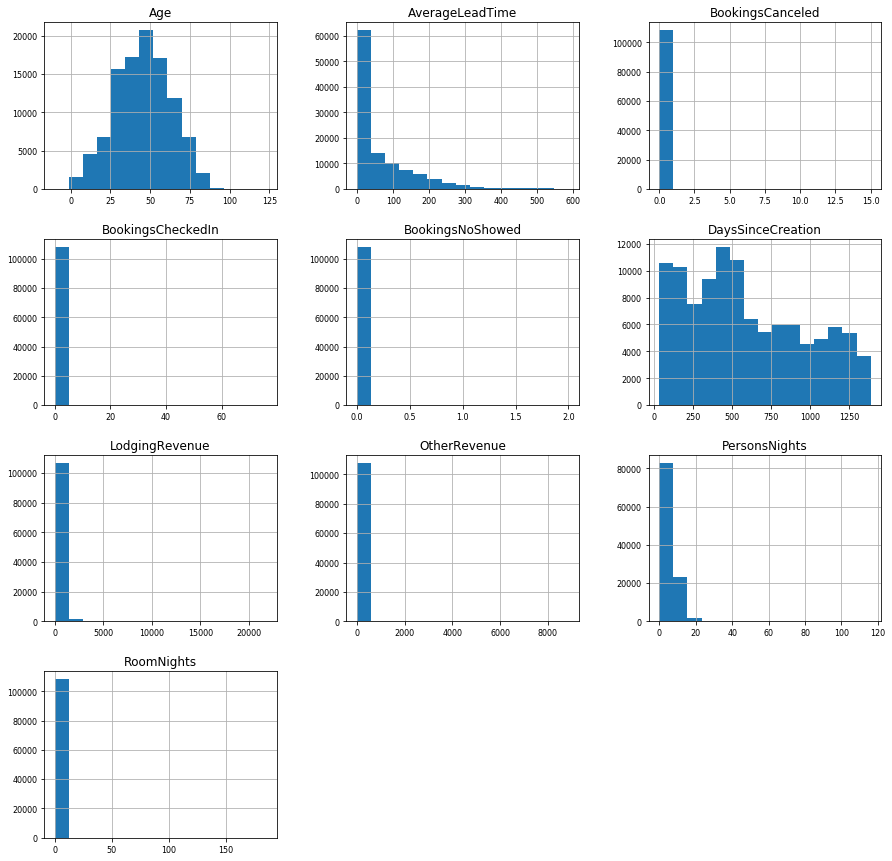

In [10]:
columns = ['Age', 'DaysSinceCreation', 'AverageLeadTime','LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed','BookingsCheckedIn','PersonsNights','RoomNights']
df_cont = df[columns]
df_cont.hist(bins=15, figsize=(15, 15), layout=(4, 3), xlabelsize=8, ylabelsize=8);

<u>Missing Values and Noise Treatment</u>


**-** The 'Age' variable, as it is possible to see above, has a symmetric distribution. For that reason, and because it is just 3% of the customers, those NaN values are going to be filled the rounded average age.

In [11]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [12]:
df = df.round({'Age':0})
df

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,46.0,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111728,111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111729,111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,...,0,0,0,0,1,0,0,0,0,0
111730,111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111731,111732,DEU,48.0,36,0xC70AE03F615CB96B0C84CF29419C2DDFE8EC64B77104...,0xF589C016E6988AECD3E3BE793E7D606BBDB6B6D4795C...,66,708.00,185.0,0,...,0,0,0,0,0,0,0,0,0,0


**-** For the 'DocIDHash' and 'NameHash' variables, since they are not needed, the best decision is to drop them.

In [13]:
df = df.drop(['NameHash', 'DocIDHash'], axis=1)
print(df.isnull().sum())

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64


**-** Now it is time to check some inconsistencies: 

- Check how many negative values there are in 'Age' and 'AverageLeadTime' variables;
- Check how many customers exist with age greater than 122 years old (which was the age of the oldest person in the world so far);
- Check how many underage costumers (less than 18 years old) there are in our dataset.

In [14]:
a = str(len(df[df.Age <= 0]))
b = str(len(df[df.Age >= 122]))
c = str(len(df[df.AverageLeadTime < 0]))
un = str(len(df[df.Age < 18]))

print('There are {} customer which Age is equal or less than zero.'.format(a))
print('')
print('There is {} customers which Age is greater than 112 years old.'.format(b))
print('')
print('There are {} customers with less than 18 years old.'.format(un))
print('')
print('There are {} customers which Average Lead Time is less than zero.'.format(c))

There are 32 customer which Age is equal or less than zero.

There is 1 customers which Age is greater than 112 years old.

There are 6777 customers with less than 18 years old.

There are 13 customers which Average Lead Time is less than zero.


**-** Since there are 6777 customers with less than 18 years old, the decision was to remove only those who appear with less than 0 years old and above 122 years old.

In [15]:
df_after = df[(df.Age > 0) & (df.Age <= 122)]
df_after = df_after[df_after.AverageLeadTime >= 0]
df_after

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,59,292.00,82.3,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,46.0,1385,61,280.00,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,93,240.00,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111728,111729,DEU,31.0,36,0,0.00,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
111729,111730,BRA,43.0,36,170,755.25,20.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
111730,111731,BRA,37.0,36,0,0.00,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
111731,111732,DEU,48.0,36,66,708.00,185.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<u>Outliers and Correlations</u>

**-** Boxplots with numeric variables to better visualize possible outliers.

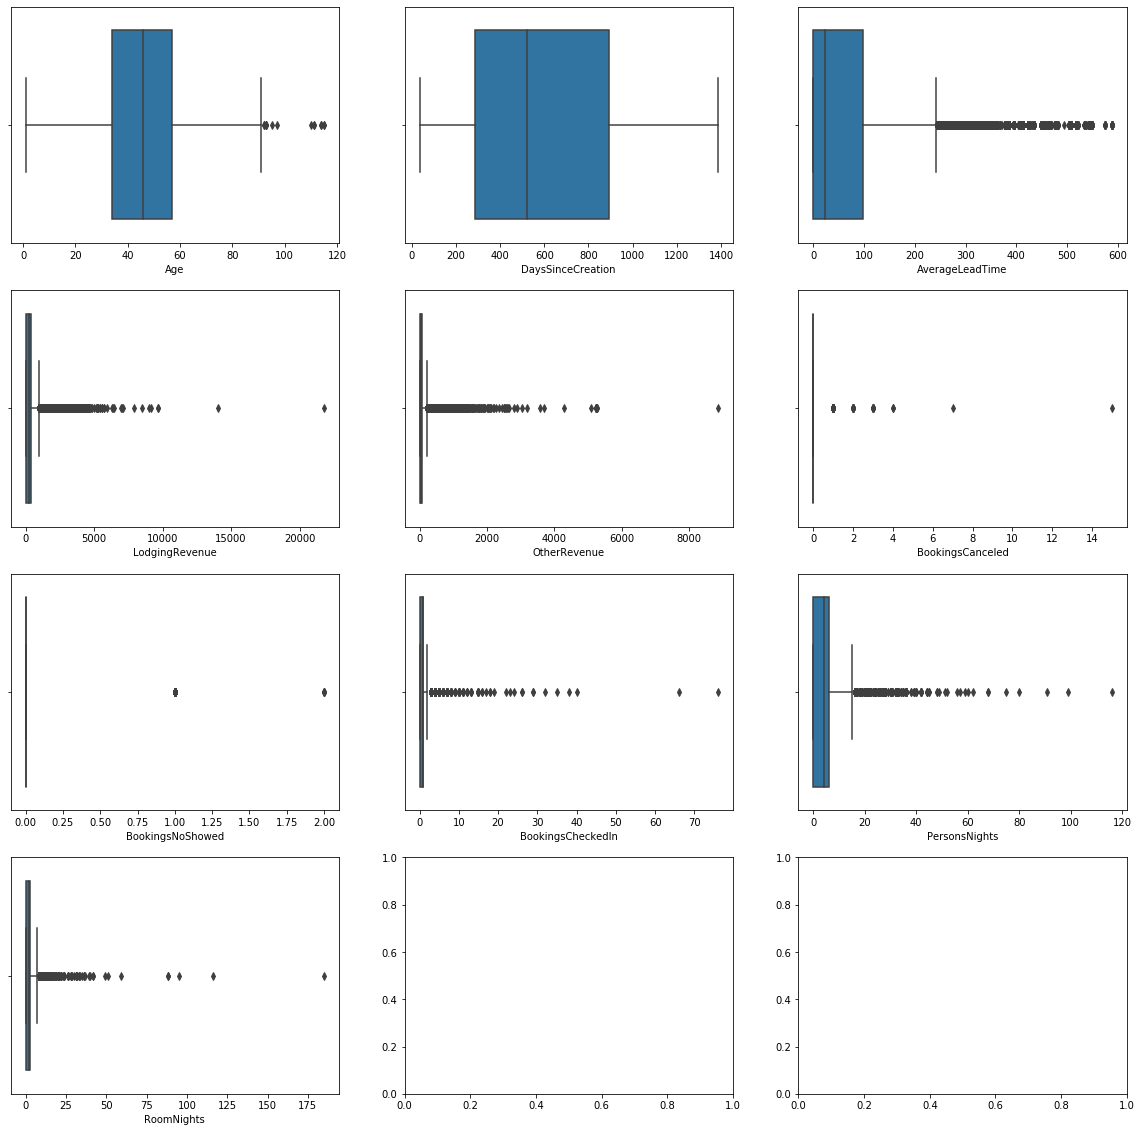

In [16]:
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
for var, subplot in zip(df_after[columns], ax.flatten()):
    sns.boxplot(df_after[var], ax=subplot)   

Outliers analysis:

- 'Age': We consider there are no outliers.
- 'DaysSinceCreation': We consider there are no outliers.
- 'AverageLeadTime': We consider there are no outliers.
- 'LodgingRevenue': We consider there are outliers after 10 000.
- 'OtherRevenue': We consider there are outliers after 6 000.
- 'BookingsCanceled': We consider there are outliers after 8.
- 'BookingsNoShowed': We consider there are no outliers.
- 'BookingsCheckedIn': We consider there are outliers after 45.
- 'PersonsNights': We consider there are outliers after 65.
- 'RoomNights': We consider there are outliers after 70.

**-** Check for customers who do not have Bookings Checked In, since they will not be relevant for our approach.

In [17]:
df_after[df_after.BookingsCheckedIn == 0]

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2,3,DEU,32.0,1385,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,JPN,50.0,1385,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,FRA,43.0,1385,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10,11,IRL,28.0,1385,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111723,111724,ITA,56.0,37,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
111725,111726,PAN,60.0,37,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
111728,111729,DEU,31.0,36,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
111730,111731,BRA,37.0,36,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


**-** Delete what was considered to be outliers and customers with 0 Bookings Checked In.

In [18]:
df_after = df_after[(df_after.LodgingRevenue < 10000) & (df_after.OtherRevenue < 6000) & (df_after.BookingsCanceled < 8)
                    & (df_after.BookingsCheckedIn < 45) & (df_after.PersonsNights < 65) & (df_after.RoomNights < 70)
                    & (df_after.BookingsCheckedIn > 0)]

**-** Boxplots with numeric variables after removing the ouliers and customers with 0 Bookings Checked In.

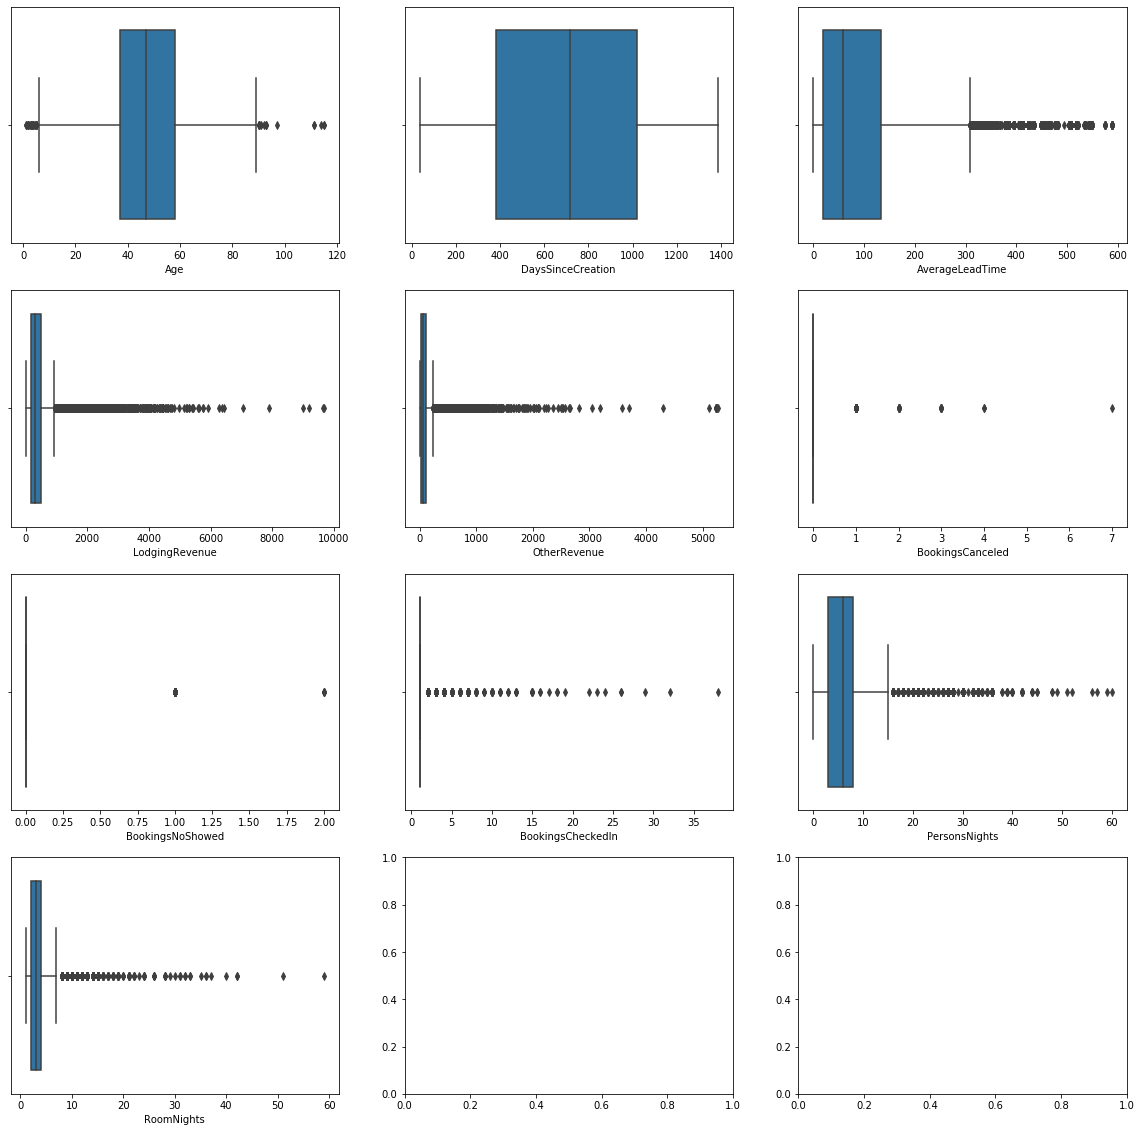

In [19]:
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
for var, subplot in zip(df_after[columns], ax.flatten()):
    sns.boxplot(df_after[var], ax=subplot) 

**-** Check for customers with BookingsNoShowed and BookingsCanceled superior to 0.

In [20]:
f = str(len(df_after[(df_after.BookingsNoShowed > 0)]))
g = str(len(df_after[(df_after.BookingsCanceled > 0)]))

print('There are {} which BookingsNoShowed are superior to zero.'.format(f))
print('')
print('There are {} which BookingsCanceled are superior to zero.'.format(g))

There are 35 which BookingsNoShowed are superior to zero.

There are 121 which BookingsCanceled are superior to zero.


**-** Drop the customers with LodgingRevenue equal to 0 when they do not have BookingsNoShowed, BookingsCheckedIn and BookingsCanceled.

In [21]:
indexpeople = df_after[(df_after.LodgingRevenue == 0) & (df_after.BookingsNoShowed == 0) & (df_after.BookingsCheckedIn == 0) & (df_after.BookingsCanceled == 0)].index
df_after.drop(indexpeople, inplace=True)
df_after

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,59,292.00,82.3,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,46.0,1385,61,280.00,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,93,240.00,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,6,JPN,55.0,1385,58,230.00,24.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,8,FRA,33.0,1385,38,535.00,94.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111724,111725,ESP,60.0,37,43,875.00,167.8,0,0,1,...,0,0,0,0,0,1,1,0,0,0
111726,111727,PRT,51.0,37,7,173.55,18.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
111727,111728,DEU,34.0,36,41,98.00,14.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
111729,111730,BRA,43.0,36,170,755.25,20.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


**-** Check the correlation between all numeric variables.

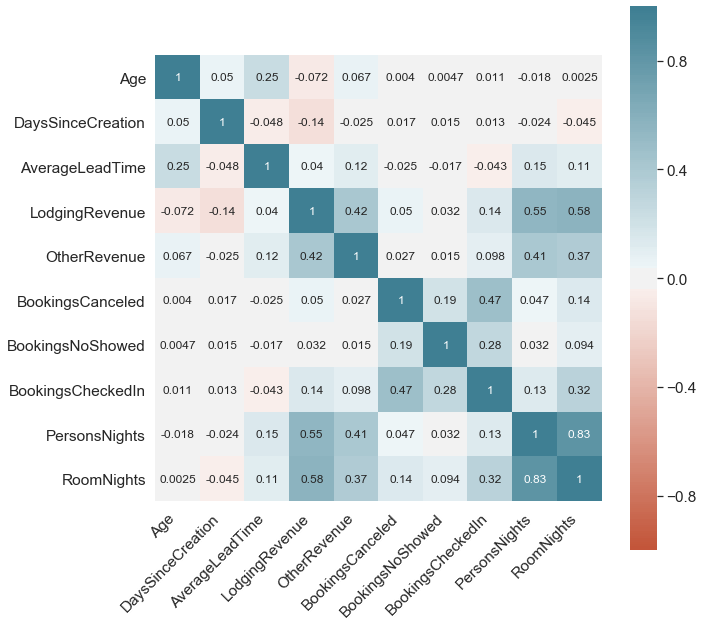

In [22]:
corr = df_after[columns].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**-** Variables with high correlation:

- Lodging Revenue and Room Nights
- Lodging Revenue and Persons Nights
- Persons Nights and Room Nights
- BookingsCheckedIn and Room Nights

**-** Drop the 'PersonsNights' variable.

In [23]:
df_after = df_after.drop(['PersonsNights'], axis=1)

<h4><u>Categorical Variables

**-** Distribution Channel

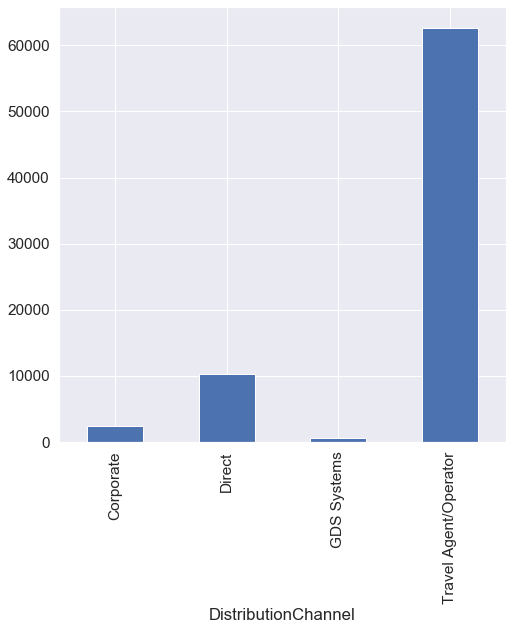

In [24]:
# Check counts of categorical variables
df_cat = df_after.loc[:,['ID','DistributionChannel','MarketSegment']]
channel =df_cat.groupby(['DistributionChannel'])['ID'].count()

channel.plot(kind="bar", 
                 figsize=(8,8))

**-** Market Segment

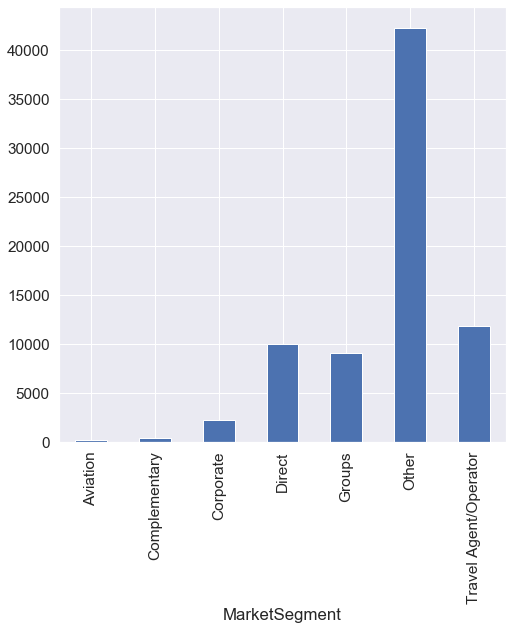

In [25]:
market =df_cat.groupby(['MarketSegment'])['ID'].count()

market.plot(kind="bar", 
                 figsize=(8,8))

**-** Market Segment per Distribution Channel

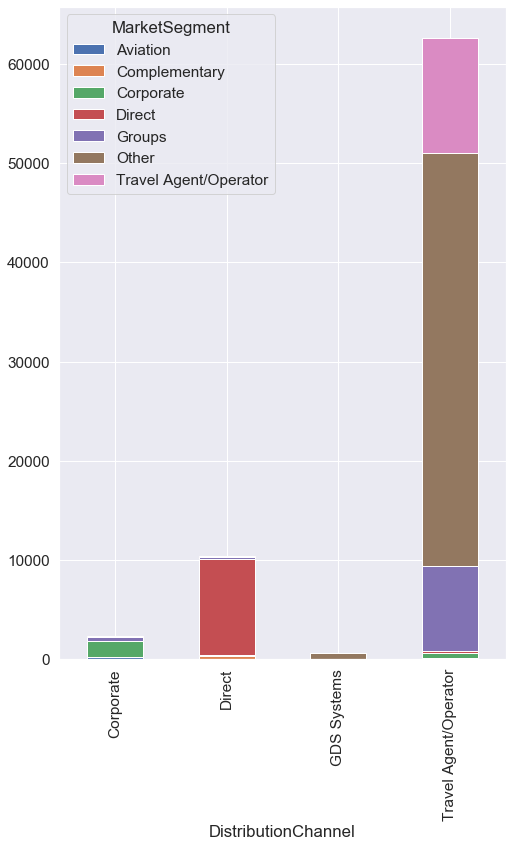

In [26]:
channel_market =df_cat.pivot_table(values='ID', columns='MarketSegment', index='DistributionChannel', aggfunc='count')
channel_market = channel_market.fillna(0)
channel_market.plot(kind='bar',figsize=(8,12),stacked=True,legend=True)

It is possible to observe that most of the customers came from Travel Agents or Operators channels, being the majority of them of the Travel Agent/Operator, Groups and Other Market Segments. 

**Note**: There are equal names in the Market Segment and Distribution Channel, such as Corporate, Travel Agent/Operator and Direct.

**-** Revenue per Distribution Channel

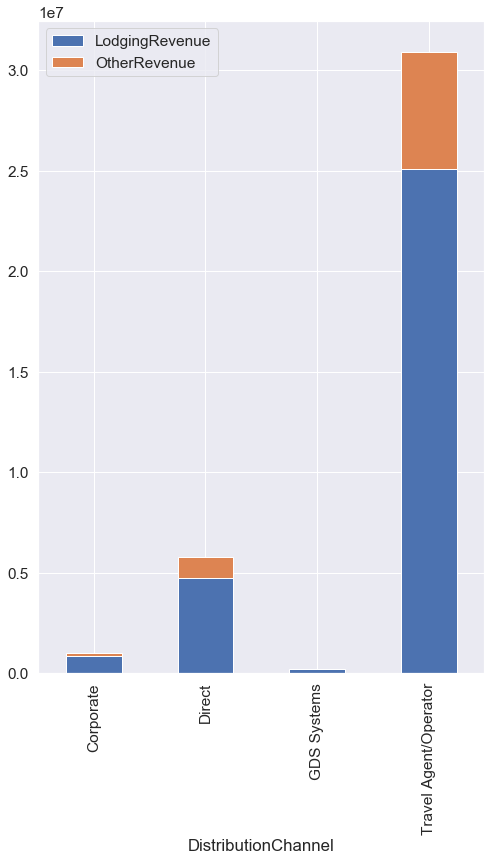

In [27]:
df_rev1 = df_after.pivot_table(values=['LodgingRevenue','OtherRevenue'], index='DistributionChannel', aggfunc='sum')
df_rev1.plot(kind='bar',figsize=(8,12),stacked=True,legend=True) 

**-** Revenue per Market Segment

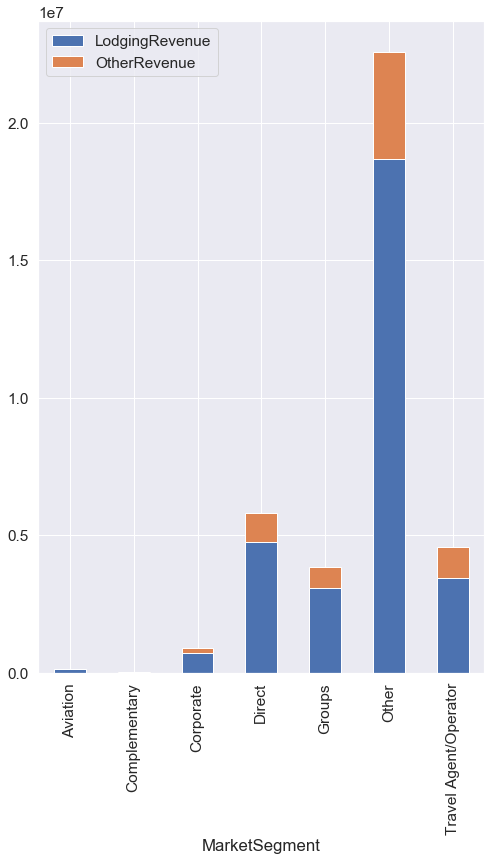

In [28]:
df_rev2 = df_after.pivot_table(values=['LodgingRevenue','OtherRevenue'], index='MarketSegment', aggfunc='sum')
df_rev2.plot(kind='bar',figsize=(8,12),stacked=True,legend=True) 

**-** Average Lead Time per Market Segment

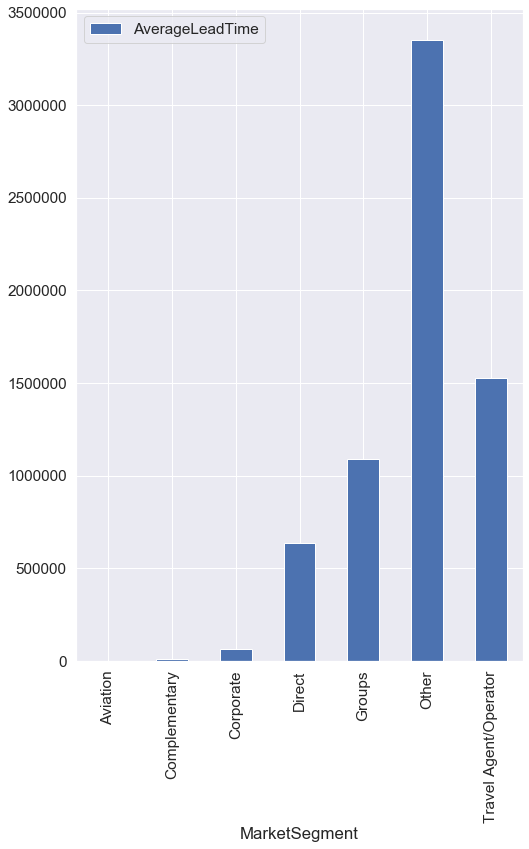

In [29]:
df_alt = df_after.pivot_table(values=['AverageLeadTime'], index='MarketSegment', aggfunc='sum')
df_alt.plot(kind='bar',figsize=(8,12),stacked=True,legend=True) 

**-** Check the number of nationalities in this dataset?

In [30]:
n = len(df_after['Nationality'].drop_duplicates().to_list())
print('There are {} different nationalities.'.format(n))

There are 184 different nationalities.


In [31]:
df_after.Nationality.unique()

array(['PRT', 'FRA', 'JPN', 'IRL', 'ESP', 'BEL', 'AUT', 'DEU', 'ITA',
       'CHN', 'RUS', 'POL', 'USA', 'CRI', 'CHE', 'ROU', 'GBR', 'BRA',
       'FIN', 'AGO', 'NLD', 'CAN', 'ZAF', 'GRC', 'AUS', 'ISR', 'BGR',
       'SAU', 'SWE', 'ARG', 'ARM', 'CHL', 'MAR', 'MOZ', 'KOR', 'TUN',
       'DNK', 'NOR', 'MYS', 'EGY', 'HRV', 'JOR', 'LUX', 'TUR', 'IRN',
       'LBY', 'PAN', 'COL', 'VEN', 'DZA', 'GNB', 'CZE', 'SVN', 'AZE',
       'IND', 'HUN', 'NZL', 'PER', 'LTU', 'TWN', 'SRB', 'EST', 'KAZ',
       'KWT', 'IDN', 'UKR', 'MEX', 'SVK', 'MLI', 'ARE', 'BGD', 'THA',
       'TZA', 'BIH', 'LVA', 'PHL', 'BHR', 'NAM', 'BOL', 'CYP', 'SGP',
       'CMR', 'MLT', 'URY', 'PAK', 'JAM', 'ECU', 'SYC', 'QAT', 'PRY',
       'BRB', 'OMN', 'TMP', 'ABW', 'LBN', 'AIA', 'SLV', 'DMA', 'CUB',
       'VNM', 'GEO', 'IRQ', 'GAB', 'UGA', 'LIE', 'SEN', 'BLR', 'ISL',
       'DOM', 'GUY', 'LCA', 'CPV', 'ATA', 'NGA', 'RWA', 'CIV', 'ALB',
       'MKD', 'MNE', 'GTM', 'GHA', 'MDV', 'MCO', 'MUS', 'SYR', 'TGO',
       'LKA', 'SUR',

 **-** Create a variable 'Continent' in order to aggregate these countries by continent and drop the variable 'Nationality'.

In [32]:
mapping = {'PRT':'Europe', 'DEU':'Europe', 'FRA':'Europe', 'IRL':'Europe', 'ESP':'Europe', 'BEL':'Europe', 
         'NLD':'Europe', 'AUT':'Europe', 'ITA':'Europe', 'RUS':'Europe', 'POL':'Europe', 'HUN':'Europe', 'CHE':'Europe', 
         'ROU':'Europe', 'GBR':'Europe', 'BIH':'Europe', 'FIN':'Europe', 'GRC':'Europe','BGR':'Europe',
         'SWE':'Europe', 'DNK':'Europe', 'NOR':'Europe', 'HRV':'Europe', 'LUX':'Europe', 'CZE':'Europe', 'AND':'Europe',
         'SVN':'Europe', 'LTU':'Europe', 'SRB':'Europe', 'EST':'Europe', 'UKR':'Europe', 'SVK':'Europe', 'LVA':'Europe',
         'CYP':'Europe', 'MLT':'Europe', 'LIE':'Europe', 'BLR':'Europe', 'ISL':'Europe', 'ALB':'Europe', 'MKD':'Europe',
         'MNE':'Europe', 'MCO':'Europe', 'FRO':'Europe', 'JEY':'Europe', 'GIB':'Europe', 'SMR':'Europe', 'SJM':'Europe',
         'JPN':'Asia', 'CHN':'Asia', 'TWN':'Asia', 'ISR':'Asia', 'SAU':'Asia', 'ARM':'Asia', 'KOR':'Asia', 'MYS':'Asia',
         'IND':'Asia', 'JOR':'Asia', 'IRN':'Asia', 'AZE':'Asia', 'KAZ':'Asia', 'KWT':'Asia', 'IDN':'Asia', 'BGD':'Asia',
         'THA':'Asia', 'PHL':'Asia', 'BHR':'Asia', 'SGP':'Asia', 'PAK':'Asia', 'QAT':'Asia', 'OMN':'Asia', 'LBN':'Asia',
         'VNM':'Asia', 'IRQ':'Asia','MDV':'Asia',  'SYR':'Asia', 'LKA':'Asia', 'HKG':'Asia', 'UZB':'Asia', 'TJK':'Asia',
         'LAO':'Asia', 'TUR':'Asia', 'GEO':'Asia', 'KGZ':'Asia', 'TKM':'Asia', 'MMR':'Asia', 'IOT':'Asia', 'NPL':'Asia',
         'AFG':'Asia', 'USA':'America', 'CRI':'America', 'MEX':'America', 'BRA':'America', 'CAN':'America', 'ARG':'America',
         'CHL':'America', 'PAN':'America', 'COL':'America', 'VEN':'America', 'PER':'America', 'BOL':'America', 
         'URY':'America', 'JAM':'America', 'ECU':'America', 'PRY':'America', 'BRB':'America', 'ABW':'America',
         'AIA':'America', 'SLV':'America', 'DMA':'America', 'CUB':'America', 'DOM':'America', 'GUY':'America',
         'LCA':'America', 'GTM':'America', 'SUR':'America', 'PRI':'America', 'SPM':'America', 'NIC':'America', 
         'ATG':'America', 'FLK':'America', 'BHS':'America', 'UMI':'America', 'HTI':'America', 'VIR':'America',
         'VCT':'America', 'GUF':'America', 'GRD':'America', 'TTO':'America', 'HND':'America', 'BMU':'America', 
         'KNA':'America', 'CYM':'America', 'AGO':'Africa', 'ZAF':'Africa', 'MAR':'Africa', 'MOZ':'Africa', 'TUN':'Africa',
         'EGY':'Africa', 'CPV':'Africa', 'COD':'Africa', 'DZA':'Africa', 'LBY':'Africa', 'GNB':'Africa', 'UGA':'Africa',
         'MLI':'Africa', 'TZA':'Africa', 'NAM':'Africa', 'CMR':'Africa', 'SYC':'Africa', 'TMP':'Africa', 'GAB':'Africa',
         'SEN':'Africa', 'NGA':'Africa', 'RWA':'Africa', 'CIV':'Africa', 'GHA':'Africa', 'MUS':'Africa', 'TGO':'Africa',
         'KEN':'Africa', 'MRT':'Africa', 'CAF':'Africa', 'STP':'Africa', 'SDN':'Africa', 'SLE':'Africa', 'COM':'Africa',
         'ETH':'Africa', 'BEN':'Africa', 'ZWE':'Africa', 'BWA':'Africa', 'ERI':'Africa', 'GNQ':'Africa', 'MDG':'Africa',
         'GIN':'Africa', 'SWZ':'Africa', 'SOM':'Africa', 'MWI':'Africa', 'TCD':'Africa', 'YEM':'Africa', 'NER':'Africa',
         'BFA':'Africa', 'BDI':'Africa', 'AUS':'Oceania', 'NZL':'Oceania', 'ARE':'Oceania', 'NCL':'Oceania', 
         'KIR':'Oceania', 'WLF':'Oceania', 'PNG':'Oceania', 'WSM':'Oceania', 'NRU':'Oceania', 'PCN':'Oceania', 
         'FJI':'Oceania', 'TON':'Oceania', 'FSM':'Oceania', 'ATA':'Antartica', 'ATF':'Antartica', 'ASM':'Antartica'}

df_after['Continent'] = df_after.Nationality.map(mapping)

In [33]:
df_after = df_after.drop('Nationality', axis = 1)

<h4><u>Boolean Variables

**-** Check the distribution of the values in the boolean varibales.

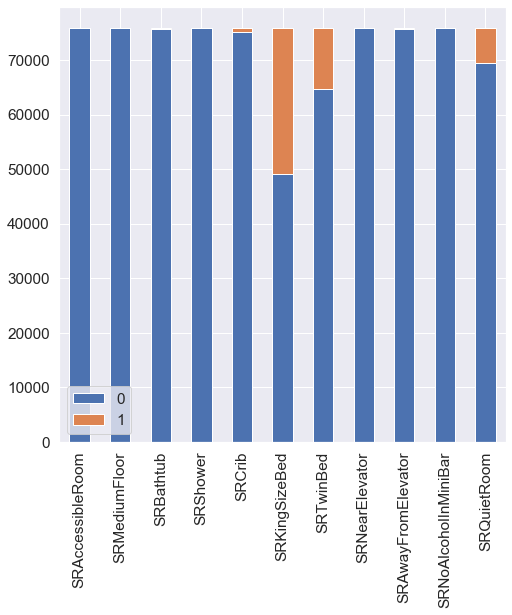

In [34]:
columns = df_after.columns.to_list()
boleans = df_after[columns[14:-1]]
#count per 0 and 1
boleans = boleans.apply(pd.Series.value_counts).transpose()

boleans.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

**-** Check the requirements per Market Segment.

In [35]:
bl = ['MarketSegment', 'SRHighFloor', 'SRLowFloor',
       'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']
yes = df_after[bl]
yes = yes.pivot_table(values=['SRHighFloor', 'SRLowFloor',
       'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom'], index='MarketSegment', aggfunc='sum')
yes

,SRAccessibleRoom,SRAwayFromElevator,SRBathtub,SRCrib,SRHighFloor,SRKingSizeBed,SRLowFloor,SRMediumFloor,SRNearElevator,SRNoAlcoholInMiniBar,SRQuietRoom,SRShower,SRTwinBed
MarketSegment,,,,,,,,,,,,,
Aviation,0,0,0,0,0,20,0,0,0,0,1,0,0
Complementary,0,0,1,12,8,136,0,1,0,0,2,0,43
Corporate,1,1,0,5,11,276,0,4,0,0,3,0,161
Direct,2,69,68,217,492,2066,18,12,6,1,416,48,838
Groups,3,6,1,23,19,1825,2,0,1,0,18,0,1736
Other,13,187,128,460,2478,21292,69,32,16,9,6013,75,6727
Travel Agent/Operator,1,14,23,84,142,1255,3,6,3,0,91,4,1792


**-** Check the number of customers who answered yes to each of the requirements.

In [36]:
i = str(len(df_after[(df_after.SRLowFloor == 1)]))
j = str(len(df_after[(df_after.SRAccessibleRoom == 1)]))
k = str(len(df_after[(df_after.SRMediumFloor == 1)]))
l = str(len(df_after[(df_after.SRBathtub == 1)]))
m = str(len(df_after[(df_after.SRShower == 1)]))
n = str(len(df_after[(df_after.SRCrib == 1)]))
o = str(len(df_after[(df_after.SRKingSizeBed == 1)]))
p = str(len(df_after[(df_after.SRTwinBed == 1)]))
q = str(len(df_after[(df_after.SRNearElevator == 1)]))
r = str(len(df_after[(df_after.SRAwayFromElevator == 1)]))
s = str(len(df_after[(df_after.SRNoAlcoholInMiniBar == 1)]))
t = str(len(df_after[(df_after.SRQuietRoom == 1)]))

print('There are {} customers that answer yes to SRLowFloor.'.format(i))
print('')
print('There are {} customers that answer yes to SRAccessibleRoom.'.format(j))
print('')
print('There are {} customers that answer yes to SRMediumFloor.'.format(k))
print('')
print('There are {} customers that answer yes to SRBathtub.'.format(l))
print('')
print('There are {} customers that answer yes to SRShower.'.format(m))
print('')
print('There are {} customers that answer yes to SRCrib.'.format(n))
print('')
print('There are {} customers that answer yes to SRKingSizeBed.'.format(o))
print('')
print('There are {} customers that answer yes to SRTwinBed.'.format(p))
print('')
print('There are {} customers that answer yes to SRNearElevator.'.format(q))
print('')
print('There are {} customers that answer yes to SRAwayFromElevator.'.format(r))
print('')
print('There are {} customers that answer yes to SRNoAlcoholInMiniBar.'.format(s))
print('')
print('There are {} customers that answer yes to SRQuietRoom.'.format(t))

There are 92 customers that answer yes to SRLowFloor.

There are 20 customers that answer yes to SRAccessibleRoom.

There are 55 customers that answer yes to SRMediumFloor.

There are 221 customers that answer yes to SRBathtub.

There are 127 customers that answer yes to SRShower.

There are 801 customers that answer yes to SRCrib.

There are 26870 customers that answer yes to SRKingSizeBed.

There are 11297 customers that answer yes to SRTwinBed.

There are 26 customers that answer yes to SRNearElevator.

There are 277 customers that answer yes to SRAwayFromElevator.

There are 10 customers that answer yes to SRNoAlcoholInMiniBar.

There are 6544 customers that answer yes to SRQuietRoom.


- With these results, we believe we should use the SRCrib, SRKingSizeBed, SRTwinBed and SRQuietRoom variables. 

In [37]:
df_after.columns

Index(['ID', 'Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'RoomNights', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'Continent'],
      dtype='object')

**-** Create a new dataset with only the variables we believe are important for the new market segmentation, the aim of this project.

In [38]:
data = pd.DataFrame([df_after.Age, df_after.AverageLeadTime, df_after.LodgingRevenue, df_after.OtherRevenue,
                     df_after.BookingsCanceled, df_after.BookingsNoShowed, df_after.BookingsCheckedIn,
                     df_after.RoomNights, df_after.DistributionChannel, df_after.SRCrib, df_after.SRKingSizeBed,
                     df_after.SRTwinBed, df_after.SRQuietRoom, df_after.Continent]).transpose()

In [39]:
data.isnull().sum()

Age                    0
AverageLeadTime        0
LodgingRevenue         0
OtherRevenue           0
BookingsCanceled       0
BookingsNoShowed       0
BookingsCheckedIn      0
RoomNights             0
DistributionChannel    0
SRCrib                 0
SRKingSizeBed          0
SRTwinBed              0
SRQuietRoom            0
Continent              0
dtype: int64

**-** Create three new variables:

- Lodging/Book - LodgingRevenue divided by BookingsCheckedIn;
- OtherRev/Book - OtherRevenue divided by BookingsCheckedIn;
- Bookings/Days - BookingsCheckedIn divided by DaysSinceCreation.

In [40]:
data['Lodging/Book'] = df_after['LodgingRevenue']/df_after['BookingsCheckedIn']
data['OtherRev/Book'] = df_after['OtherRevenue']/df_after['BookingsCheckedIn']
data['Bookings/Days'] = df_after['BookingsCheckedIn']/df_after['DaysSinceCreation']

**-** Drop the variables 'LodgingRevenue' and 'OtherRevenue', since the variables created before transmit even more information related with these variables.

In [41]:
data = data.drop(['LodgingRevenue','OtherRevenue'], axis = 1)

In [42]:
data.describe()

,Lodging/Book,OtherRev/Book,Bookings/Days
count,75941.000000,75941.000000,75941.000000
mean,395.878982,90.545170,0.002838
std,357.201726,128.899972,0.003791
min,0.000000,0.000000,0.000722
25%,186.000000,28.000000,0.000988
50%,307.840000,57.600000,0.001416
75%,479.520000,113.800000,0.002695
max,9682.400000,5268.500000,0.080214


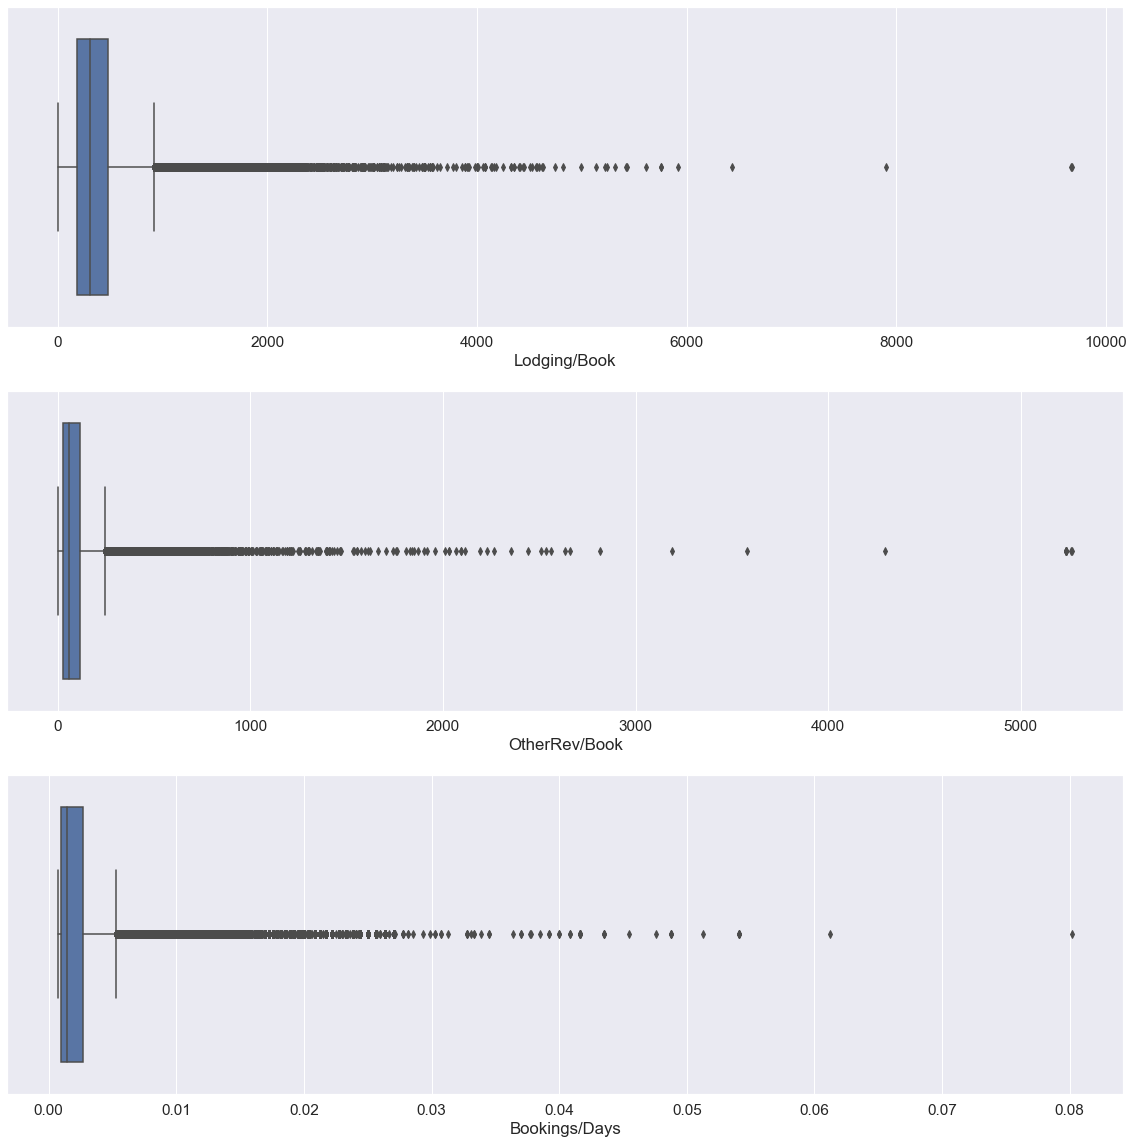

In [43]:
columns1 = ['Lodging/Book', 'OtherRev/Book', 'Bookings/Days']
fig, ax = plt.subplots(3, 1, figsize=(20, 20))
for var, subplot in zip(data[columns1], ax.flatten()):
    sns.boxplot(data[var], ax=subplot) 


<h3>Data Preparation

**Bin of continuous variables**

**-** Age

In [44]:
data['age_bins'] = pd.cut(x=data['Age'], bins=[0, 18, 24, 44, 64, 123], labels=['0 - 18 years', '19 - 24 years', '25 - 44 years', '45 - 64 years', '65 or + years'])
data = data.drop(['Age'], axis=1)

**-** AverageLeadTime

In [45]:
data['AverageLeadTime_bin'] = pd.cut(x=data['AverageLeadTime'], bins=[-1, 30, 183, 365,900], labels=['< 1 month', '1 month - 6 months', '6 months - 1 year', '> 1 year'])
data = data.drop(['AverageLeadTime'], axis=1)

**-** RoomNights

In [46]:
data['RoomNights_bin'] = pd.cut(x=data['RoomNights'], bins=[0, 3, 15, 70], labels=['normal', 'intermediate', 'high'])
data = data.drop(['RoomNights'], axis=1)

**-** BookingsCanceled

In [47]:
data['BookCanceled_bin'] = pd.cut(x=data['BookingsCanceled'], bins=[-1, 0, 8], labels=['Never Canceled','Canceled'])
data = data.drop(['BookingsCanceled'], axis=1)

**-** BookingsNoShowed

In [48]:
data['BookNoShowed_bin'] = pd.cut(x=data['BookingsNoShowed'], bins=[-1, 0, 3], labels=['Showed', 'Never Showed'])
data = data.drop(['BookingsNoShowed'], axis=1)

**-** BookingsCheckedIn

In [49]:
data['BookCheckedIn_bin'] = pd.cut(x=data['BookingsCheckedIn'], bins=[-1, 1, 4, 40], labels=['Normal', 'Medium', 'Frequent'])
data = data.drop(['BookingsCheckedIn'], axis=1)

**-** Lodging/Book

In [50]:
data['Lodging/Book_bin'] = pd.cut(x=data['Lodging/Book'], bins=[-1, 500, 4000, 10000], labels=['Low', 'Medium', 'High'])
data = data.drop(['Lodging/Book'], axis=1)

**-** OtherRev/Bok

In [51]:
data['OtherRev/Book_bin'] = pd.cut(x=data['OtherRev/Book'], bins=[-1, 60, 1250, 5500], labels=['Low', 'Medium', 'High'])
data = data.drop(['OtherRev/Book'], axis=1)

**-** Bookings/Days

In [52]:
data['Bookings/Days_bin'] = pd.cut(x=data['Bookings/Days'], bins=[-1, 0.01, 0.05, 0.09], labels=['Occasionaly', 'Frequent', 'Very Frequent'])
data = data.drop(['Bookings/Days'], axis=1)

In [53]:
data.isnull().sum()

DistributionChannel    0
SRCrib                 0
SRKingSizeBed          0
SRTwinBed              0
SRQuietRoom            0
Continent              0
age_bins               0
AverageLeadTime_bin    0
RoomNights_bin         0
BookCanceled_bin       0
BookNoShowed_bin       0
BookCheckedIn_bin      0
Lodging/Book_bin       0
OtherRev/Book_bin      0
Bookings/Days_bin      0
dtype: int64

**-** Encode categorical variables to dummy variables

In [54]:
cols = ['DistributionChannel', 'Continent', 'age_bins', 'AverageLeadTime_bin', 'RoomNights_bin', 'BookCanceled_bin', 'BookNoShowed_bin', 'BookCheckedIn_bin', 'Lodging/Book_bin', 'OtherRev/Book_bin', 'Bookings/Days_bin']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
data = ce_one_hot.fit_transform(data)
data

,DistributionChannel_Corporate,DistributionChannel_Travel Agent/Operator,DistributionChannel_Direct,DistributionChannel_GDS Systems,SRCrib,SRKingSizeBed,SRTwinBed,SRQuietRoom,Continent_Europe,Continent_Asia,...,BookCheckedIn_bin_Frequent,Lodging/Book_bin_Low,Lodging/Book_bin_Medium,Lodging/Book_bin_High,OtherRev/Book_bin_Low,OtherRev/Book_bin_Medium,OtherRev/Book_bin_High,Bookings/Days_bin_Occasionaly,Bookings/Days_bin_Frequent,Bookings/Days_bin_Very Frequent
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
7,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111724,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
111726,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
111727,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
111729,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


**-** Change 'SRCrib', 'SRKingSizeBed', 'SRTwinBed' and 'SRQuietRoom' variables to int64.

In [55]:
data['SRCrib'] = data.SRCrib.astype('int64')
data['SRKingSizeBed'] = data.SRKingSizeBed.astype('int64')
data['SRTwinBed'] = data.SRTwinBed.astype('int64')
data['SRQuietRoom'] = data.SRQuietRoom.astype('int64')

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75941 entries, 0 to 111731
Data columns (total 42 columns):
DistributionChannel_Corporate                75941 non-null int64
DistributionChannel_Travel Agent/Operator    75941 non-null int64
DistributionChannel_Direct                   75941 non-null int64
DistributionChannel_GDS Systems              75941 non-null int64
SRCrib                                       75941 non-null int64
SRKingSizeBed                                75941 non-null int64
SRTwinBed                                    75941 non-null int64
SRQuietRoom                                  75941 non-null int64
Continent_Europe                             75941 non-null int64
Continent_Asia                               75941 non-null int64
Continent_America                            75941 non-null int64
Continent_Africa                             75941 non-null int64
Continent_Oceania                            75941 non-null int64
Continent_Antartica             

**-** Normalize all variables.

In [57]:
# Get a copy of the dataframe before normalization:
data_beforeNorm = data.copy(deep=True)

# Normalize all columns:
cols = list(data.columns) # save the name of the columns
data_array = data.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data_array)
data = pd.DataFrame(data_scaled, columns=cols)

In [58]:
data

,DistributionChannel_Corporate,DistributionChannel_Travel Agent/Operator,DistributionChannel_Direct,DistributionChannel_GDS Systems,SRCrib,SRKingSizeBed,SRTwinBed,SRQuietRoom,Continent_Europe,Continent_Asia,...,BookCheckedIn_bin_Frequent,Lodging/Book_bin_Low,Lodging/Book_bin_Medium,Lodging/Book_bin_High,OtherRev/Book_bin_Low,OtherRev/Book_bin_Medium,OtherRev/Book_bin_High,Bookings/Days_bin_Occasionaly,Bookings/Days_bin_Frequent,Bookings/Days_bin_Very Frequent
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75936,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
75937,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
75938,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
75939,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


<h4><u>Principal Component Analysis

**-** Plot a scatter plot of the two Principal Components.

(75941, 2)


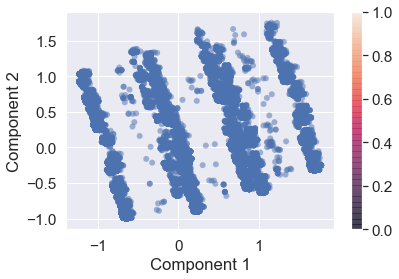

In [59]:
# Let's start to visualise with only two components so we can see this in two dimensions
pca2 = PCA(n_components = 2)
pca2.fit(data)
data_pca2 = pca2.transform(data) # Apply the dimension reduction to the dataset
print(data_pca2.shape)

plt.scatter(data_pca2[:, 0], data_pca2[:, 1], edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

In [60]:
# Fit the PCA algorithm to data 
pca = PCA().fit(data)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(data.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.216129,0.216129
1,2,0.108726,0.324855
2,3,0.106590,0.431446
3,4,0.090795,0.522241
4,5,0.074157,0.596398
5,6,0.061534,0.657932
6,7,0.057609,0.715540
7,8,0.056439,0.771980
8,9,0.046198,0.818178
9,10,0.037165,0.855343


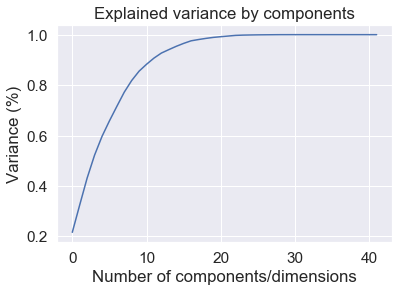

In [61]:
# Plot the cumulative explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance (%)')
plt.title('Explained variance by components')
plt.show()

With 19 components is possible to explain 99.2% of the variance.

In [62]:
# Apply the dimension reduction to the dataset (for 19 components)
pca_reduced = PCA(n_components = 19)
pca_reduced.fit(data)
data_pca_reduced = pca_reduced.transform(data) 
print(data_pca_reduced.shape)

(75941, 19)


**-** Plot the elbow graph and the silhouette plot in order to select the number of K.

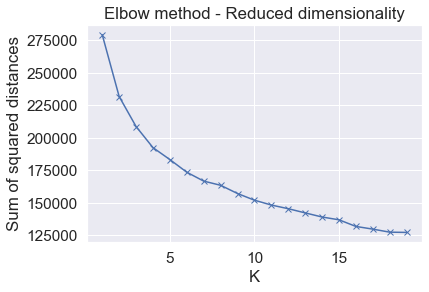

In [63]:
# Select K based on the sum of squared distances
ssd = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k, random_state=123)
    km = km.fit(data_pca_reduced)
    ssd.append(km.inertia_)
    
# Plot results
plt.plot(K, ssd, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method - Reduced dimensionality')
plt.show()

In [64]:
def silhouette_plot(dataframe):
    X = dataframe
    range_n_clusters = [3, 4, 5, 6]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1) = plt.subplots(1, 1)
        fig.set_size_inches(12, 7)

        # The 1st subplot is the silhouette plot.
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1,1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=0, n_init = 5, max_iter = 200)
        cluster_labels = clusterer.fit_predict(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax1.set_title("The silhouette plot for {} clusters.".format(str(n_clusters)))
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

For n_clusters = 3 The average silhouette_score is : 0.16050254809952497
For n_clusters = 4 The average silhouette_score is : 0.15495174816203022
For n_clusters = 5 The average silhouette_score is : 0.14911784764226313
For n_clusters = 6 The average silhouette_score is : 0.16101301173662816


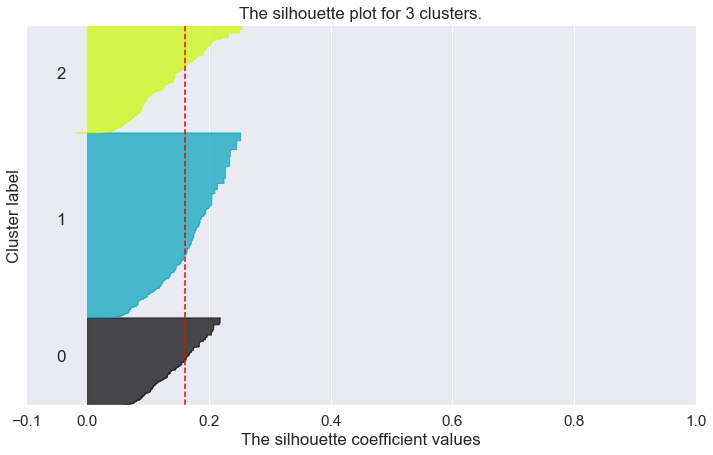

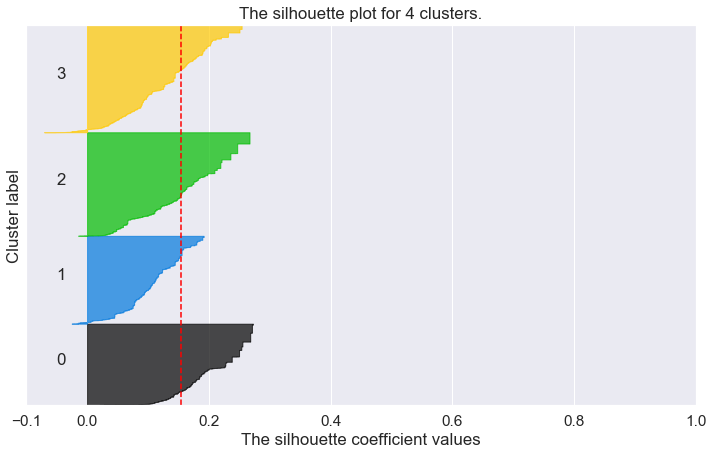

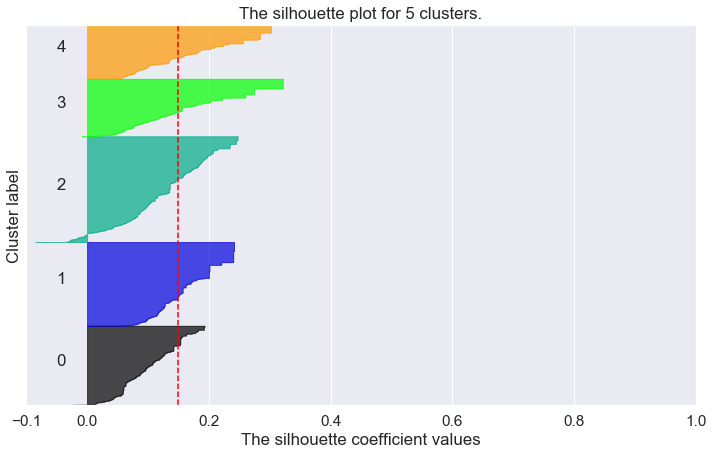

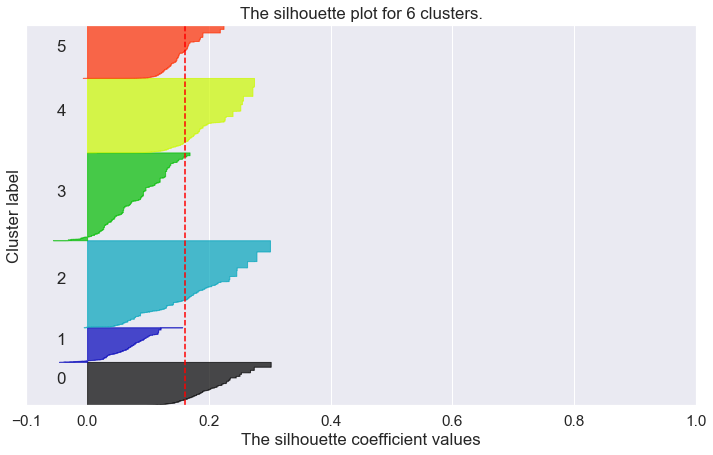

In [65]:
silhouette_plot(data_pca_reduced)

**-** After taking into cosideration the elbow graph and the silhouette coefficient, K=6 seems to be a good choice to apply the K-means algorithm.

In [66]:
# Apply the K-Means for K=6
K=6
kmeans = KMeans(n_clusters=K, random_state=123)
kmeans.fit(data_pca_reduced)
y_kmeans = kmeans.predict(data_pca_reduced)

**-** See the distribution of the customers according to the cluster they belong.

In [67]:
# Count observations per cluster
data_beforeNorm.groupby(y_kmeans).size()

0     9345
1    11452
2     8657
3    14131
4    16144
5    16212
dtype: int64

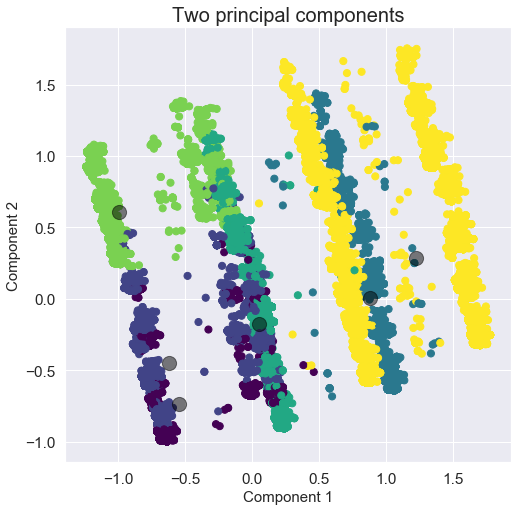

In [68]:
# Plot results two principal components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Two principal components', fontsize = 20)
ax.scatter(data_pca_reduced[:, 0], data_pca_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [69]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=data.columns)
wheightsDF

,DistributionChannel_Corporate,DistributionChannel_Travel Agent/Operator,DistributionChannel_Direct,DistributionChannel_GDS Systems,SRCrib,SRKingSizeBed,SRTwinBed,SRQuietRoom,Continent_Europe,Continent_Asia,...,BookCheckedIn_bin_Frequent,Lodging/Book_bin_Low,Lodging/Book_bin_Medium,Lodging/Book_bin_High,OtherRev/Book_bin_Low,OtherRev/Book_bin_Medium,OtherRev/Book_bin_High,Bookings/Days_bin_Occasionaly,Bookings/Days_bin_Frequent,Bookings/Days_bin_Very Frequent
0,-0.021389,4.398821e-02,-1.603889e-02,-6.560445e-03,2.381168e-03,4.112404e-02,1.816159e-02,2.725733e-02,0.015862,-0.011991,...,-0.000429,-3.201271e-01,0.319460,0.000667,-0.438041,0.437081,0.000960,-0.026075,0.025992,0.000083
1,0.037297,-1.885446e-01,1.419889e-01,9.258269e-03,7.524721e-03,4.997043e-03,-5.704915e-02,-3.897911e-03,-0.009190,0.004851,...,0.002739,-1.591539e-01,0.158604,0.000550,-0.045539,0.045443,0.000096,-0.004543,0.004471,0.000072
2,-0.018065,6.637530e-02,-4.726020e-02,-1.050566e-03,1.271810e-02,5.578173e-02,1.251577e-02,-1.004759e-02,-0.035319,0.013197,...,-0.001362,-1.656440e-02,0.016443,0.000121,0.053355,-0.053351,-0.000003,-0.008863,0.008826,0.000037
3,0.018929,-1.054092e-01,8.027968e-02,6.200273e-03,-2.166416e-04,5.724432e-02,-1.258313e-01,1.849775e-02,0.004222,0.015774,...,0.002973,-2.048069e-01,0.204607,0.000200,0.481569,-0.483225,0.001656,0.014335,-0.014226,-0.000109
4,0.049795,-4.579145e-01,3.975902e-01,1.052935e-02,4.308270e-04,-7.044527e-01,1.968645e-01,-8.237265e-02,0.088472,-0.012633,...,-0.000552,-9.392283e-02,0.093877,0.000046,-0.037966,0.037566,0.000400,-0.001546,0.001701,-0.000156
5,0.010269,-3.018291e-01,2.858707e-01,5.689773e-03,1.254405e-02,4.793643e-01,-2.515678e-01,2.122847e-02,-0.159003,0.022752,...,-0.001264,-2.255642e-01,0.225625,-0.000061,-0.135367,0.136060,-0.000693,-0.013408,0.013543,-0.000135
6,-0.020592,1.923010e-01,-1.684470e-01,-3.261727e-03,-7.750515e-03,-1.562651e-01,2.448220e-01,2.583904e-02,-0.452215,0.090183,...,-0.003365,-3.908954e-01,0.390793,0.000103,0.157812,-0.158731,0.000919,-0.058024,0.057907,0.000116
7,0.027773,-2.994689e-01,2.682659e-01,3.430106e-03,2.281537e-03,8.627558e-02,-9.049371e-02,-5.903780e-02,-0.491407,0.060390,...,0.003311,3.037127e-01,-0.304888,0.001175,-0.005083,0.005057,0.000025,-0.005113,0.004707,0.000406
8,0.002512,-2.314806e-01,2.293079e-01,-3.387679e-04,-3.785201e-03,2.799598e-01,-1.123913e-01,2.454782e-02,0.327635,-0.083444,...,0.001984,-1.154117e-01,0.115381,0.000031,0.156207,-0.156333,0.000126,-0.073874,0.073663,0.000210
9,-0.009193,-4.836167e-02,5.918093e-02,-1.625795e-03,8.964088e-03,-3.533826e-03,4.779262e-02,1.709261e-03,-0.181026,0.023287,...,-0.000516,6.830516e-02,-0.068355,0.000050,-0.011627,0.012146,-0.000518,-0.086839,0.086540,0.000299


In [70]:
# Study the weights of component 19
comp = abs(wheightsDF.iloc[18])
comp = comp.sort_values(ascending=False)
comp

AverageLeadTime_bin_> 1 year                 0.789098
AverageLeadTime_bin_< 1 month                0.268005
AverageLeadTime_bin_6 months - 1 year        0.267099
Continent_Oceania                            0.259415
AverageLeadTime_bin_1 month - 6 months       0.253994
Continent_Asia                               0.173461
age_bins_0 - 18 years                        0.146448
Continent_Africa                             0.124395
Continent_Europe                             0.107114
Continent_America                            0.104854
age_bins_65 or + years                       0.103139
age_bins_19 - 24 years                       0.019003
SRQuietRoom                                  0.018948
OtherRev/Book_bin_Medium                     0.014628
OtherRev/Book_bin_Low                        0.013765
age_bins_45 - 64 years                       0.013487
DistributionChannel_Corporate                0.012413
DistributionChannel_Travel Agent/Operator    0.011533
RoomNights_bin_normal       

In [72]:
top_features = comp.index
clustersMeanDF = pd.DataFrame(data_beforeNorm[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose().sort_index()

,0,1,2,3,4,5
AverageLeadTime_bin_1 month - 6 months,0.821081,0.842910,0.600323,0.468474,0.000000,0.604059
AverageLeadTime_bin_6 months - 1 year,0.175602,0.147398,0.143468,0.214564,0.000743,0.139465
AverageLeadTime_bin_< 1 month,0.000000,0.000000,0.252050,0.258297,0.999257,0.253763
AverageLeadTime_bin_> 1 year,0.003317,0.009693,0.004158,0.058665,0.000000,0.002714
BookCanceled_bin_Canceled,0.000856,0.000524,0.000924,0.000354,0.005203,0.000617
BookCanceled_bin_Never Canceled,0.999144,0.999476,0.999076,0.999646,0.994797,0.999383
BookCheckedIn_bin_Frequent,0.000749,0.000611,0.001040,0.000283,0.005265,0.000247
BookCheckedIn_bin_Medium,0.019369,0.022092,0.033268,0.007430,0.038342,0.017580
BookCheckedIn_bin_Normal,0.979882,0.977297,0.965693,0.992286,0.956392,0.982174
BookNoShowed_bin_Never Showed,0.000214,0.000000,0.000347,0.000071,0.001611,0.000185


**Cluster 0 - Friends - stay lots of nights, spends a few money, and books in advance.**

- 85.5% of the customers are from Europe;
- 45-64 years;
- 82.1% of the customers usually do their reservations 1-6 months before and 17.6% 6 months - 1 year before;
- 88.5% of the customers came from a Travel Agent/Operator Distribution Channel;
- 96.8% of the customers spend less than 500€ per booking with lodging revenues;
- spend less than 60€ per booking with other revenues;
- 84.3% stay 1-3 nights and 15.6% stay 3-15 nights.
- 33.3% prefer king size bed and 14.2% twin bed.

**Cluster 1 - Modern Backpackers - spends less money with bookings but stays more nights than usual and books in advance.**

- 81.5% are from Europe;
- 68,3% have ages between 25-44 years and 23.4% more than 65 years;
- 84.3% of the customers usually do their reservations 1-6 months before and 14.7% 6 months - 1 year before;
- 88.4% of the customers came from a Travel Agent/Operator Distribution Channel;
- 96.7% of the customers spend less than 500€ per booking with lodging revenues;
- spend less than 60€ per booking with other revenues;
- 83.2% stay 1-3 nights and 16.8% stay 3-15 nights.
- 33.4% prefer king size bed and 16.8% twin bed.

**Cluster 2 - Touristic package - stays lots of nights, spends just a bit of money with lodging revenues and a bit much in other revenues, and comes from Travel Agent/Operator**

- 86.7% of the customers are from Europe;
- 31.1% between 25-44 years and 47.3% 45-64 years;
- 60% of the customers usually do their reservations 1-6 months before and 25.2% 6 months - 1 year before;
- 88.9% of the customers came from a Travel Agent/Operator Distribution Channel;
- 99.7% of the customers spend less than 500€ per booking with lodging revenues;
- 99.8% spend between 60€-1250€ per booking with other revenues;
- stay 3-15 nights.
- 38.7% prefer king size bed and 11.7% twin bed.

**Cluster 3 - Short Break - stays just a few nights, spends less with lodging and more with other revenues.**

- 85.8% of the customers are from Europe;
- 26.3% between 25-44 years and 41.2% 45-64 years;
- 46.9% of the customers usually do their reservations 1-6 months before, 21.5% 6 months - 1 year before and 25.8% less than 1 month;
- 87.6% of the customers came from a Travel Agent/Operator Distribution Channel;
- 99.8% of the customers spend less than 500€ per booking with lodging revenues;
- spend between 60€-1250€ per booking with other revenues;
- stay 1-3 nights.
- 34.6% prefer king size bed and 21.6% twin bed.

**Cluster 4 - Enterprise - people who stay just a few nights, spends a small amount of money, and books very near arrival date.**

- 82.7% of the customers are from Europe;
- 43.5% between 25-44 years and 45.6% 45-64 years;
- 99.9% less than 1 month;
- 68.4% of the customers came from a Travel Agent/Operator, 8.5% Corporate and 20.7% Direct Distribution Channel;
- 96.6% of the customers spend less than 500€ per booking with lodging revenues;
- spend less than 60€ per booking with other revenues;
- 91.6% stay 1-3 nights.
- 33.4% prefer king size bed.

**Cluster 5 - Family - stay lots of nights and spends a great amount of money, and books in advance.**

- 84.1% of the customers are from Europe;
- 32.9% between 25-44 years, 48.9% 45-64 years;
- 60.4% of the customers usually do their reservations 1-6 months before, 13.9% 6 months - 1 year before and 25.4% less than 1 month;
- 81% of the customers came from a Travel Agent/Operator and 16.8% Direct Distribution Channel;
- 99.9% of the customers spend 500€-4000€ per booking with lodging revenues;
- 78.8% spend less than 60€ per booking with other revenues and 21% spend 60€-1250€;
- 20.9% stay 1-3 nights and 78.8% spend 3-15 nights.
- 38.9% prefer king size bed, 13.2% quiet room and 16.5% twin bed.